In [18]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [19]:
image_path = os.path.join(os.getcwd(), 'annotations')
xml_list = []
#000***.xml - till this it works

for xml_file in glob.glob(image_path + '/000***.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
        value = (root.find('filename').text,
                 int(root.find('size')[0].text),
                 int(root.find('size')[1].text),
                 member[0].text,
                 int(member[4][0].text),
                 int(member[4][1].text),
                 int(member[4][2].text),
                 int(member[4][3].text)
                 )
        xml_list.append(value)
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
xml_df = pd.DataFrame(xml_list, columns=column_name)
xml_df.to_csv('raccoon_labels.csv', index=None)
print('Successfully converted xml to csv.')

 

Successfully converted xml to csv.


In [20]:
import numpy as np
import pandas as pd
np.random.seed(1)

In [21]:
full_labels = pd.read_csv('pascal_labels.csv')

In [22]:
full_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,000005.jpg,500,375,chair,263,211,324,339
1,000005.jpg,500,375,chair,165,264,253,372
2,000005.jpg,500,375,chair,5,244,67,374
3,000005.jpg,500,375,chair,241,194,295,299
4,000005.jpg,500,375,chair,277,186,312,220


In [23]:
grouped = full_labels.groupby('filename')

In [24]:
grouped.apply(lambda x: len(x)).value_counts()

1     176
2     123
3      56
4      38
5      25
6      23
7      17
10     12
9      10
8       6
11      4
28      1
12      1
13      1
15      1
16      1
17      1
37      1
dtype: int64

In [25]:
gb = full_labels.groupby('filename')

In [26]:
grouped_list = [gb.get_group(x) for x in gb.groups]

In [27]:
len(grouped_list)

497

In [28]:
train_index = np.random.choice(len(grouped_list), size=160, replace=False)
test_index = np.setdiff1d(list(range(200)), train_index)

In [29]:
len(train_index), len(test_index)

(160, 141)

In [30]:
# take first 200 files
train = pd.concat([grouped_list[i] for i in train_index])
test = pd.concat([grouped_list[i] for i in test_index])

In [31]:
len(train), len(test)

(545, 426)

In [32]:
train.to_csv('train_labels.csv', index=None)
test.to_csv('test_labels.csv', index=None)

In [25]:
image_path = os.path.join(os.getcwd(), 'annotations')
xml_list = []
#000***.xml - till this it works

for xml_file in glob.glob(image_path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
        value = (root.find('filename').text,
                 int(root.find('size')[0].text),
                 int(root.find('size')[1].text),
                 member[0].text
                 #int(member[4][0].text),
                 #int(member[4][1].text),
                 #int(member[4][2].text),
                 #int(member[4][3].text)
                 )
        xml_list.append(value)
print(xml_list)


[('000005.jpg', 500, 375, 'chair'), ('000005.jpg', 500, 375, 'chair'), ('000005.jpg', 500, 375, 'chair'), ('000005.jpg', 500, 375, 'chair'), ('000005.jpg', 500, 375, 'chair'), ('000007.jpg', 500, 333, 'car'), ('000009.jpg', 500, 375, 'horse'), ('000009.jpg', 500, 375, 'person'), ('000009.jpg', 500, 375, 'person'), ('000009.jpg', 500, 375, 'person'), ('000012.jpg', 500, 333, 'car'), ('000016.jpg', 334, 500, 'bicycle'), ('000017.jpg', 480, 364, 'person'), ('000017.jpg', 480, 364, 'horse'), ('000019.jpg', 500, 375, 'cat'), ('000019.jpg', 500, 375, 'cat'), ('000020.jpg', 375, 500, 'car'), ('000021.jpg', 336, 500, 'dog'), ('000021.jpg', 336, 500, 'person'), ('000021.jpg', 336, 500, 'person'), ('000021.jpg', 336, 500, 'person'), ('000023.jpg', 334, 500, 'bicycle'), ('000023.jpg', 334, 500, 'bicycle'), ('000023.jpg', 334, 500, 'bicycle'), ('000023.jpg', 334, 500, 'person'), ('000023.jpg', 334, 500, 'person'), ('000023.jpg', 334, 500, 'person'), ('000024.jpg', 500, 335, 'train'), ('000026.jpg'

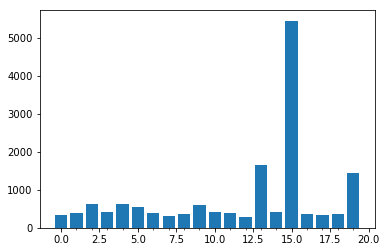

In [75]:
import numpy as np
x = set(list((Counter(new_list).keys())))
y = list(Counter(new_list).values())

set_list = []
for e in x:
    set_list.append(e)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x_pos,y)
ax.set_xticks(x_pos, set_list)
plt.show()